In [142]:
import numpy as np
import pandas as pd
import re
from PIL import Image
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis

In [38]:
#bring in single image and convert to np array
img = Image.open("openlabeling/images/20181115_103532.jpg")
img.size
a = np.asarray(img)

In [58]:
#break 3D array into 3 2D arrays for color channels
a[0,0,1]
color_chanel_0 = a[:,:,0]
color_chanel_1 = a[:,:,1]
color_chanel_2 = a[:,:,2]

#convert one channel 2D array back to and image and display 
i = Image.fromarray(color_chanel_2)
i

array([[[179, 182, 163],
        [180, 183, 164],
        [181, 184, 163],
        ...,
        [172, 189, 196],
        [172, 187, 192],
        [171, 186, 189]],

       [[176, 179, 162],
        [177, 180, 163],
        [177, 180, 161],
        ...,
        [170, 187, 194],
        [169, 184, 189],
        [169, 184, 187]],

       [[174, 176, 163],
        [174, 176, 162],
        [175, 177, 163],
        ...,
        [170, 187, 194],
        [166, 184, 188],
        [167, 182, 185]],

       ...,

       [[156, 164, 149],
        [157, 165, 150],
        [157, 165, 150],
        ...,
        [178, 196, 210],
        [178, 196, 210],
        [178, 196, 210]],

       [[156, 164, 149],
        [156, 164, 149],
        [157, 165, 150],
        ...,
        [177, 193, 206],
        [177, 193, 206],
        [177, 193, 208]],

       [[156, 164, 151],
        [156, 164, 151],
        [157, 165, 152],
        ...,
        [176, 190, 203],
        [177, 191, 204],
        [177, 191, 204]]

Working with 50 images
Image examples: 
20181115_110516.jpg


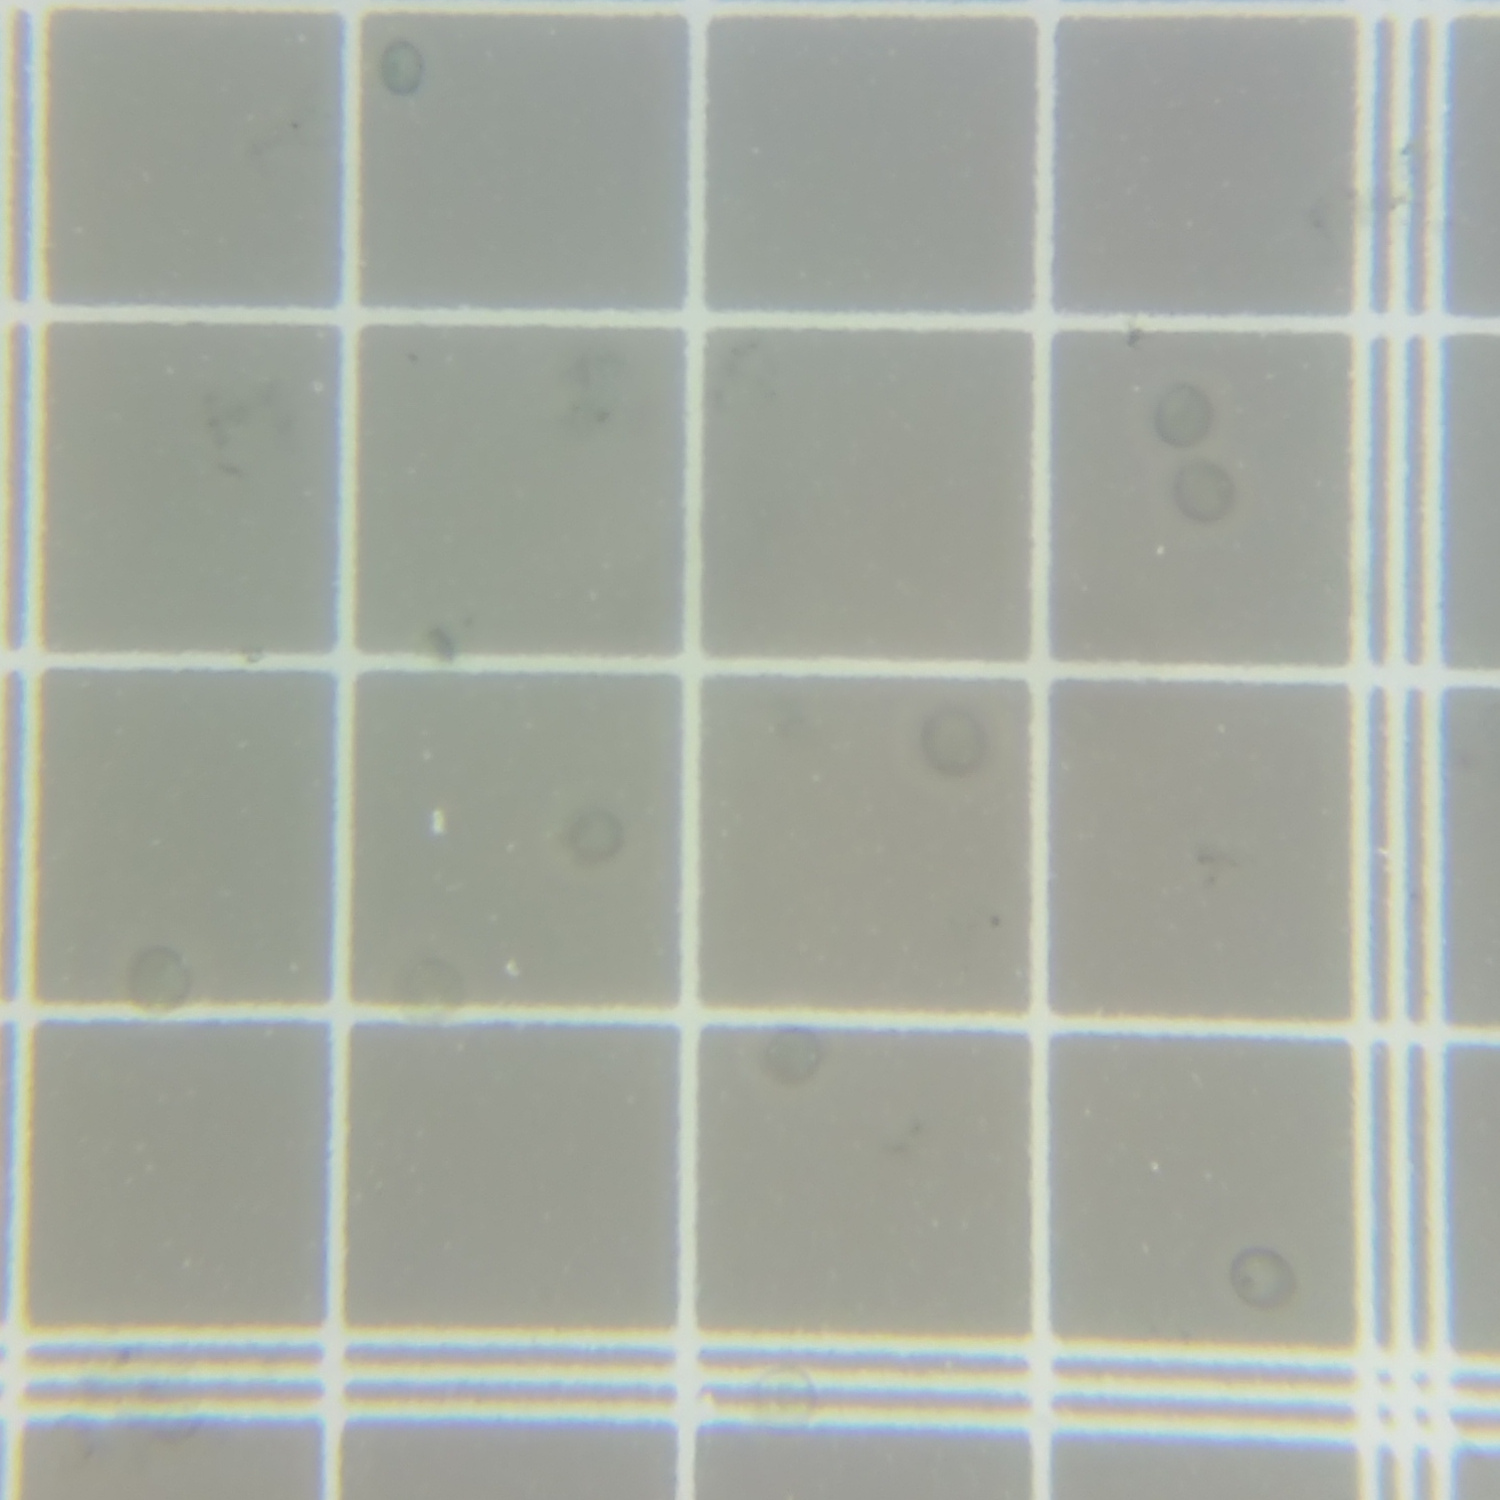

20181115_104653.jpg


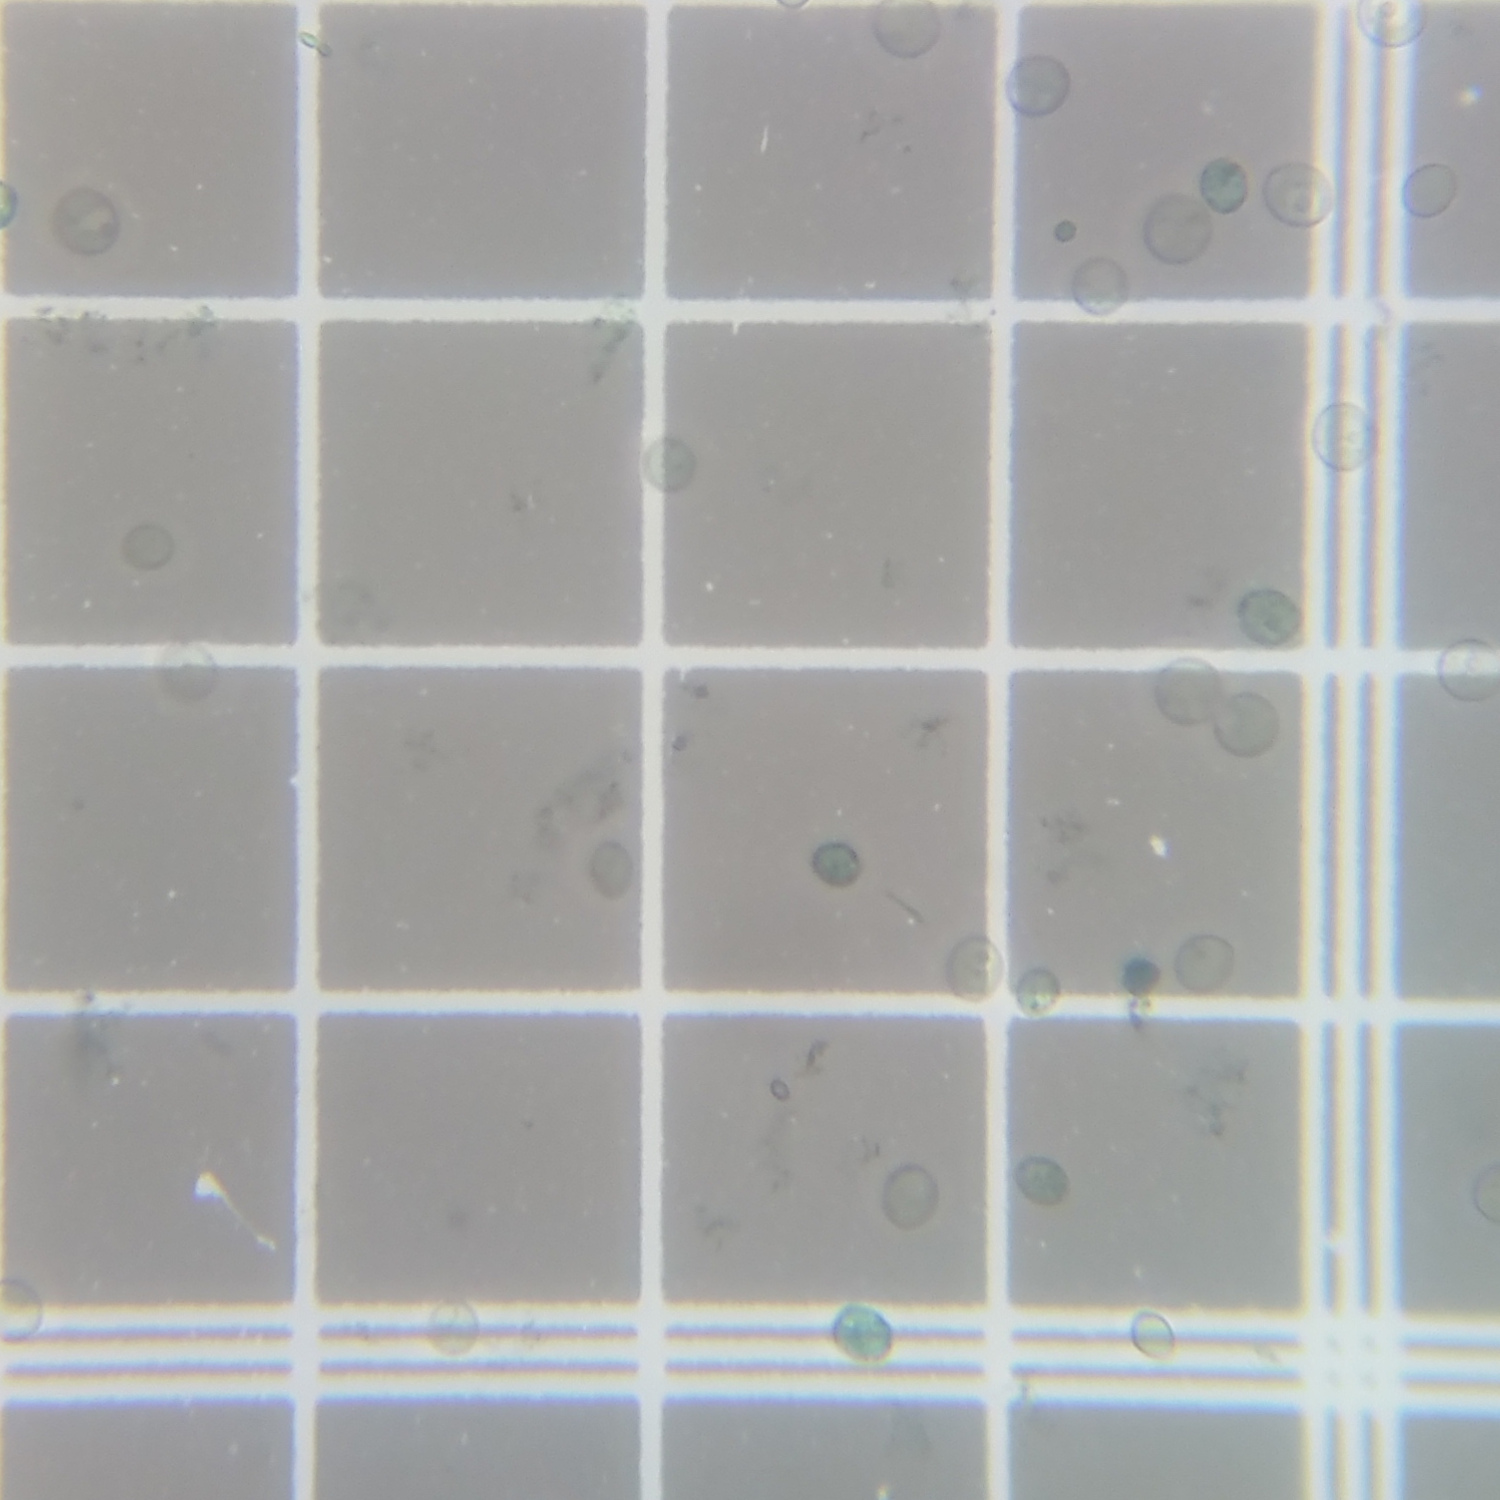

In [63]:
#import all test images
image_folder = "openlabeling/images"
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

#test two files
print("Working with {0} images".format(len(image_files)))
print("Image examples: ")

for i in range(40, 42):
    print(image_files[i])
    display(_Imgdis(filename=image_folder + "/" + image_files[i], width=240, height=320))

In [168]:
df = pd.DataFrame(columns = ['alive/dead_0/1','point_1_x','point_1_y','point_2_x','point_2_y','image'])

In [138]:
#import all test images
txt_folder = "openlabeling/bbox_txt"
txt_files = [f for f in os.listdir(txt_folder) if os.path.isfile(os.path.join(txt_folder, f))]

print("Working with {0} text files".format(len(txt_files)))
print("Image examples: ")

Working with 50 text files
Image examples: 


In [195]:
#read single txt file into df
file_data = pd.read_csv("openlabeling/bbox_txt/20181115_103926.txt", sep = ' ', header = None, names = ['alive/dead_0/1','point_1_x','point_1_y','point_2_x','point_2_y','image'])
file_data['image']="openlabeling/images/20181115_103926.jpg"
#len(file_data)
file_data

int(file_data.loc[0, 'point_1_x']*1500)

180

In [196]:
file_data.point_1_x *=1500
file_data.point_1_y *=1500
file_data.point_2_x *=1500
file_data.point_2_y *=1500
file_data.point_1_x = file_data.point_1_x.astype(int)
file_data.point_1_y = file_data.point_1_y.astype(int)
file_data.point_2_x = file_data.point_2_x.astype(int)
file_data.point_2_y = file_data.point_2_y.astype(int)
file_data

,alive/dead_0/1,point_1_x,point_1_y,point_2_x,point_2_y,image
0,0,180,121,82,77,openlabeling/images/20181115_103926.jpg
1,0,870,179,69,65,openlabeling/images/20181115_103926.jpg
2,0,1460,119,72,82,openlabeling/images/20181115_103926.jpg
3,0,1387,597,72,72,openlabeling/images/20181115_103926.jpg
4,0,1161,527,54,67,openlabeling/images/20181115_103926.jpg
5,0,642,367,62,74,openlabeling/images/20181115_103926.jpg
6,0,305,437,69,71,openlabeling/images/20181115_103926.jpg
7,0,448,481,70,76,openlabeling/images/20181115_103926.jpg
8,0,754,593,55,59,openlabeling/images/20181115_103926.jpg
9,0,1099,729,59,59,openlabeling/images/20181115_103926.jpg


In [197]:
#read multiple txt file into df
frames = []
for i in range(len(txt_files)):
    #read single txt files into df
    file_data = pd.read_csv(txt_folder + "/" + txt_files[i], sep = ' ', header = None, names = ['alive/dead_0/1','point_1_x','point_1_y','point_2_x','point_2_y','image'])

    #append dataframe with current file name
    img_file = re.sub('.txt$','.jpg',txt_files[i])
    file_data['image']="openlabeling/images/"+img_file
    frames.append(file_data)

# concatenate list of all frames into one    
result = pd.concat(frames, ignore_index=True)
print(type(result), " ", result.shape)

result.point_1_x *=1500
result.point_1_y *=1500
result.point_2_x *=1500
result.point_2_y *=1500
result.point_1_x = result.point_1_x.astype(int)
result.point_1_y = result.point_1_y.astype(int)
result.point_2_x = result.point_2_x.astype(int)
result.point_2_y = result.point_2_y.astype(int)
result

<class 'pandas.core.frame.DataFrame'>   (923, 6)


,alive/dead_0/1,point_1_x,point_1_y,point_2_x,point_2_y,image
0,0,287,126,88,70,openlabeling/images/20181115_104608.jpg
1,0,252,261,95,89,openlabeling/images/20181115_104608.jpg
2,0,118,576,80,77,openlabeling/images/20181115_104608.jpg
3,0,251,581,83,87,openlabeling/images/20181115_104608.jpg
4,0,469,549,70,70,openlabeling/images/20181115_104608.jpg
5,0,750,490,62,66,openlabeling/images/20181115_104608.jpg
6,0,1214,345,77,71,openlabeling/images/20181115_104608.jpg
7,0,1307,348,77,80,openlabeling/images/20181115_104608.jpg
8,0,319,777,79,87,openlabeling/images/20181115_104608.jpg
9,0,399,763,69,72,openlabeling/images/20181115_104608.jpg
